In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Ecuaciones: 
dx/dt = a(x) - b(x)(y)
dy/dt = d(x)(y) - c(y) 


x = cantidad de conejos
y = cantidad de zorros
a = tasa de crecimiento de los conejos sin compañia de zorros
b = tasa de eliminacion de conejos por parte de los zorros
c = tasa crecimineto zorros
d = exito caza, afecta al zorro


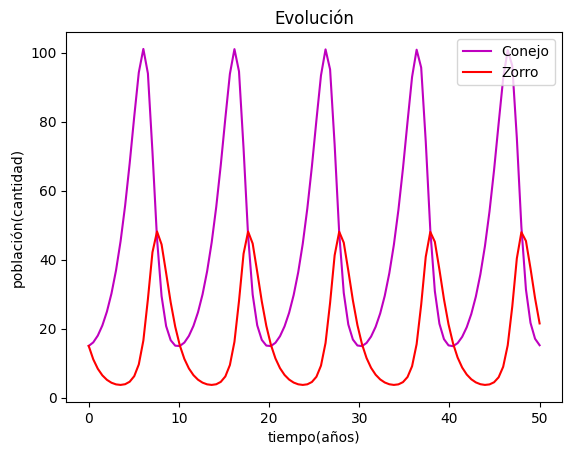

In [3]:
def tasa(cantidad, t, a, b, c, d):
    x = cantidad[0]
    y = cantidad[1]
    dx = (a*x) - (b*x*y)
    dy = (-1*c*y) + (d*x*y)  
    return np.array([dx, dy])

a = 0.52
b = 0.03
c = 0.9
d = 0.02
x = 15
y = 15
cantidadInicial = np.array([x, y])


# Tiempo por el cual se van a estar reproduciendo los zorros y conejos
tf = 50 # Tiempo final
N = 100 # Total valores que se van a evaluar 
t = np.linspace(0, tf, N) # Array con toods los valores que se va a evaluar la funcion empezando en cero

evolucion = odeint(tasa, cantidadInicial, t, args=(a, b, c, d)) # Funcion axiliar de python para resolver una ecuacion 

plt.title("Evolución")
plt.plot(t, evolucion[:, 0], label='Conejo', color='m')
plt.plot(t, evolucion[:, 1], label='Zorro', color = 'r')
plt.xlabel('tiempo(años)')
plt.ylabel('población(cantidad)')
plt.legend()

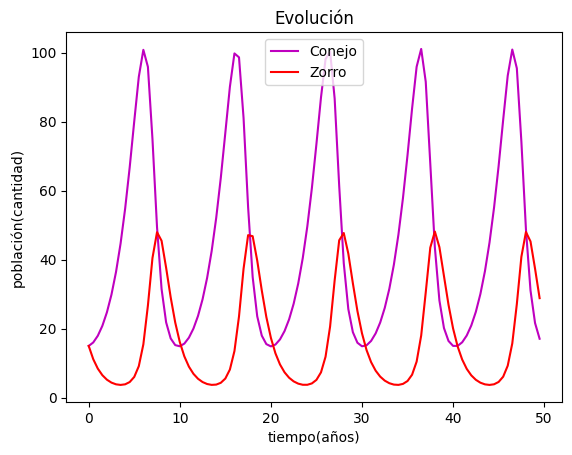

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def rungeKutta4(r, t, h,a,b,c,d):                  
        k1 = h*f(r, t,a,b,c,d)
        k2 = h*f(r+0.5*k1, t+0.5*h,a,b,c,d)
        k3 = h*f(r+0.5*k2, t+0.5*h,a,b,c,d)
        k4 = h*f(r+k3, t+h,a,b,c,d)
        return (k1 + 2*k2 + 2*k3 + k4)/6

def f(r, t,a,b,c,d):
        x, y = r[0], r[1]
        dx = (a*x) - (b*x*y)
        dy = (-1*c*y) + (d*x*y)  
        return np.array([dx, dy], float)

# Tamaño de paso
h=0.5             

# Tiempo, va de cero hasta 50 con paso h
tiempo = np.arange(0, 50, h)       

# Puntos que nos dara R-Kutta
x, y  = [], []

# Valores iniciales ( cantidad de conejos y zorros)
cantidadInicial = np.array([15, 15], float)

# Variable
a = 0.52
b = 0.03
c = 0.9
d = 0.02

def ciclo(x,y,a,b,c,d,cantidadInicial):
        for t in tiempo:
         x.append(cantidadInicial[0])         
         y.append(cantidadInicial[1])         
         cantidadInicial += rungeKutta4(cantidadInicial, t, h,a,b,c,d)     

ciclo(x,y,a,b,c,d,cantidadInicial) 

     
plt.plot(tiempo, x, label='Conejo', color='m')
plt.plot(tiempo, y , label='Zorro', color = 'r')
plt.xlabel("tiempo(años)")
plt.ylabel("población(cantidad)")
plt.title("Evolución")
plt.legend()